In [2]:
from dataset import *
from helpers.ipython import *
import itertools

%matplotlib inline

# Santander Customer Satisfaction

You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

# Первый взгляд

В обучающей выборке 76020 наблюдений, 369 признаков + 1 целевая переменная. Все признаки - числовые, в большинстве целые числа (int64 - 259, float64 - 111). Пропусков в данных нет. 34 признака  принимают только значение 0 - их можно удалить. 29 признаков имеют дубли - их тоже удаляем. Остается 306 признаков. Количество довольных пользователей в выборке - 4%.

Большинство признаков имеют не более 1000 уникальных значений. У 285 признаков модой является 0.

In [3]:
train = data.load(1).get('train')
pd_display_all(train.head())
print 'Size:\n', train.shape
print 'Types:\n', train.dtypes.value_counts()

describe = train.describe().T
print 'NA:\n', describe[describe['count'] < 76020]
print 'SAME:\n', describe[describe['std'] == 0]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

Size:
(76020, 370)
Types:
int64      259
float64    111
dtype: int64
NA:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []
SAME:
                               count  mean  std  min  25%  50%  75%  max
ind_var2_0                     76020     0    0    0    0    0    0    0
ind_var2                       76020     0    0    0    0    0    0    0
ind_var27_0                    76020     0    0    0    0    0    0    0
ind_var28_0                    76020     0    0    0    0    0    0    0
ind_var28                      76020     0    0    0    0    0    0    0
ind_var27                      76020     0    0    0    0    0    0    0
ind_var41                      76020     0    0    0    0    0    0    0
ind_var46_0                    76020     0    0    0    0    0    0    0
ind_var46                      76020     0    0    0    0    0    0    0
num_var27_0                    76020     0    0    0    0    0    0    0
num_var28_0                    76020   

In [4]:
train = data.load(2).get('train')
duplicates = {}

def add_duplicate(col1, col2):
    if col1 in duplicates:
        duplicates[col1].append(col2)
    else:
        duplicates[col1] = [col2]

for col1, col2 in itertools.combinations(train.columns, 2):
    if train[col1].equals(train[col2]):
        add_duplicate(col1, col2)
        
display(duplicates)
print len(duplicates)

{'delta_imp_reemb_var13_1y3': ['delta_num_reemb_var13_1y3'],
 'delta_imp_reemb_var17_1y3': ['delta_num_reemb_var17_1y3'],
 'delta_imp_reemb_var33_1y3': ['delta_num_reemb_var33_1y3'],
 'delta_imp_trasp_var17_in_1y3': ['delta_num_trasp_var17_in_1y3'],
 'delta_imp_trasp_var17_out_1y3': ['delta_num_trasp_var17_out_1y3'],
 'delta_imp_trasp_var33_in_1y3': ['delta_num_trasp_var33_in_1y3'],
 'delta_imp_trasp_var33_out_1y3': ['delta_num_trasp_var33_out_1y3'],
 'ind_var13_medio_0': ['ind_var13_medio'],
 'ind_var18_0': ['ind_var18'],
 'ind_var25_0': ['ind_var25'],
 'ind_var26_0': ['ind_var26'],
 'ind_var32_0': ['ind_var32'],
 'ind_var34_0': ['ind_var34'],
 'ind_var37_0': ['ind_var37'],
 'ind_var40': ['ind_var39'],
 'ind_var6': ['ind_var29'],
 'ind_var6_0': ['ind_var29_0'],
 'num_var13_medio_0': ['num_var13_medio'],
 'num_var18_0': ['num_var18'],
 'num_var25_0': ['num_var25'],
 'num_var26_0': ['num_var26'],
 'num_var32_0': ['num_var32'],
 'num_var34_0': ['num_var34'],
 'num_var37_0': ['num_var37']

29


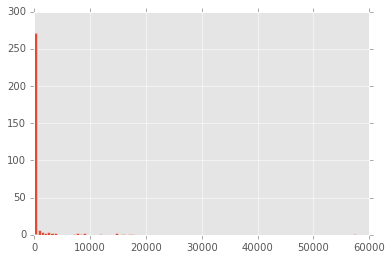

In [5]:
train = data.load(3).get('train')
nunique = train.apply(pd.Series.nunique, axis=0)
nunique.hist(bins=100)

In [6]:
target_counts = train['TARGET'].value_counts()
print 'Target counts:\n', target_counts
print 'Satisfied percent:\n', float(target_counts[1]) / (target_counts[0] + target_counts[1])

Target counts:
0    73012
1     3008
Name: TARGET, dtype: int64
Satisfied percent:
0.0395685345962


In [7]:
train.mode().T[0].value_counts()

0.000000         285
3.000000          10
1.000000           7
2.000000           2
117310.979016      1
99.000000          1
23.000000          1
Name: 0, dtype: int64

# Feature Importance

In [8]:
train = data.load(3).get('train')
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']

In [9]:
model = skl_ensemble.RandomForestClassifier(n_estimators=100, verbose=True)
model.fit(X, y)
pd.DataFrame({'val': model.feature_importances_}, index=X.columns).sort_values('val', ascending=False).head(10)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   20.7s finished


,val
var38,0.382214
var15,0.173401
saldo_medio_var5_ult3,0.028582
saldo_medio_var5_hace3,0.027802
num_var45_ult3,0.020245
saldo_var30,0.017709
saldo_medio_var5_hace2,0.016909
num_var45_hace3,0.016343
saldo_var42,0.014845
num_var45_hace2,0.014683


In [10]:
model = skl_ensemble.GradientBoostingClassifier(n_estimators=30, max_depth=7, learning_rate=0.2)
model.fit(X, y)
pd.DataFrame({'val': model.feature_importances_}, index=X.columns).sort_values('val', ascending=False).head(10)

,val
var38,0.158148
var15,0.113520
saldo_var30,0.113044
saldo_var5,0.035834
saldo_medio_var5_ult3,0.034706
saldo_medio_var5_hace2,0.030882
num_var45_ult3,0.021141
num_var45_hace2,0.020211
saldo_var42,0.019345
saldo_medio_var5_hace3,0.018532


In [11]:
model = skl.linear_model.LogisticRegression()
model.fit(skl.preprocessing.StandardScaler().fit_transform(X), y)

coefs = pd.DataFrame({'val': model.coef_[0]}, index=X.columns)
display(coefs.sort_values('val', ascending=False).head(10))
display(coefs.sort_values('val', ascending=True).head(10))

,val
saldo_medio_var8_ult3,0.691828
ind_var12,0.562350
ind_var17,0.522905
var15,0.489012
num_var5,0.466492
saldo_medio_var12_ult1,0.452000
num_var40_0,0.396541
num_var1_0,0.393982
saldo_medio_var13_corto_ult3,0.377202
num_var30,0.318930


,val
saldo_medio_var13_corto_ult1,-0.795598
saldo_medio_var8_ult1,-0.776597
ind_var13,-0.714326
var38,-0.676425
num_med_var45_ult3,-0.644450
num_meses_var17_ult3,-0.623434
num_var42,-0.603099
num_meses_var13_largo_ult3,-0.520801
num_meses_var5_ult3,-0.502768
ind_var30,-0.496308


# Important features review

In [12]:
modes = train.mode().T[0]

In [13]:
modes[modes > 10]

var15        23.000000
var36        99.000000
var38    117310.979016
Name: 0, dtype: float64

In [14]:
X['var38'][y == 1].describe()

count       3008.000000
mean       99678.280590
std       106309.811490
min        11136.630000
25%        57160.942500
50%        86219.970000
75%       117310.979016
max      3988595.100000
Name: var38, dtype: float64

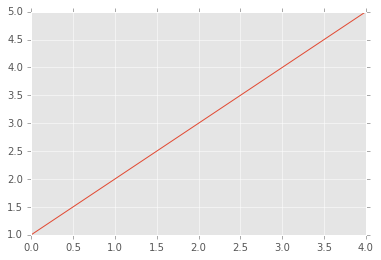

In [15]:
plt.plot([1,2,3,4,5])